# Load SpikeGlx Low Frequency (LF) data (from channel in good clusters)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from fklab.spikes.Kilosort import KiloSortResult
from fklab.io.spikeGLX import Glx

In [ ]:
# change path to file on your PC
parameter_path = ""  # paras.py
glx_data_path = ""  # .bin
nyx_evet_path = ""  # Event.evt
channelmap_path = ""  # .channelmap

In [ ]:
# load kilosort result to get clusters information
kilosort = KiloSortResult(parameter_path)
channels = kilosort.get_channel_for_cluster(kilosort.get_good_cluster_group())

# change time period you interested
time_range = (100, 200)  # sec

In [ ]:
glx_util = Glx(glx_data_path)

# set channelmap to enable channel index remapping
glx_util.set_channel_map(channelmap_path)

# give neuralynx evet file to enable time alignment
t_offset = glx_util.set_time_sync(nyx_evet_path)
print(f"time offset (glx-nyx) = {t_offset}")

nChan: 385, nFileSamp: 17152539
time offset (glx-nyx) = -677.0292460081745


The following demo show the figures with/without the channel remapping.
If you picked some channels which had been labeled as 'Disconnect', you will see
some channels' data amplitude are as large as others.

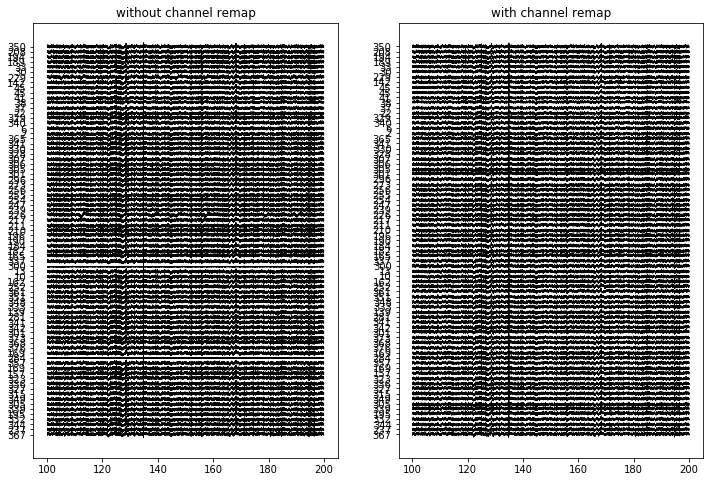

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

t = np.linspace(
    *time_range, num=int((time_range[1] - time_range[0]) * glx_util.sample_rate)
)


def _plot(ax, data):
    max_value = np.max(data)

    for i, channel in enumerate(channels):
        ax.plot(t, data[i, :] / max_value + i, color="k", lw=0.4)

    ax.set_yticks(np.arange(len(channels)))
    ax.set_yticklabels(channels)


# raw data
ax[0].set_title("without channel remap")

data = glx_util[channels, glx_util.time_slice(time_range, apply_time_offset=True)]
_plot(ax[0], data)

# channel transform data
ax[1].set_title("with channel remap")

data = glx_util.data[channels, time_range]
_plot(ax[1], data)
None